In [24]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

pd.options.display.float_format = ' {:.4f}'.format

In [25]:
df =  pd.read_csv(r'KAG_conversion_data.csv')
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.4300,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.8200,2,0
2,708771,916,103920,30-34,M,20,693,0,0.0000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.2500,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.2900,1,1


#### CHECKING MISSING VALUES 

In [26]:
df.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

#### CHECKING FOR DUPLICATE VALUES 

In [27]:
df.duplicated().sum()

0

#### DATA TYPES

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


##### NUMBER OF COMPANIES FOR CAMPAIGN 

In [29]:
print("Number of Companies for campaign : ",len(df['xyz_campaign_id'].unique()))

Number of Companies for campaign :  3


In [30]:
# Click to Impression Ratio 
df['clickToImpPer']=(df['Clicks']/df['Impressions'])*100
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,clickToImpPer
0,708746,916,103916,30-34,M,15,7350,1,1.4300,2,1,0.0136
1,708749,916,103917,30-34,M,16,17861,2,1.8200,2,0,0.0112
2,708771,916,103920,30-34,M,20,693,0,0.0000,1,0,0.0000
3,708815,916,103928,30-34,M,28,4259,1,1.2500,1,0,0.0235
4,708818,916,103928,30-34,M,28,4133,1,1.2900,1,1,0.0242
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.1900,13,2,0.0223
1139,1314411,1178,179978,45-49,F,110,637549,120,173.8800,3,0,0.0188
1140,1314412,1178,179979,45-49,F,111,151531,28,40.2900,2,0,0.0185
1141,1314414,1178,179981,45-49,F,113,790253,135,198.7100,8,2,0.0171


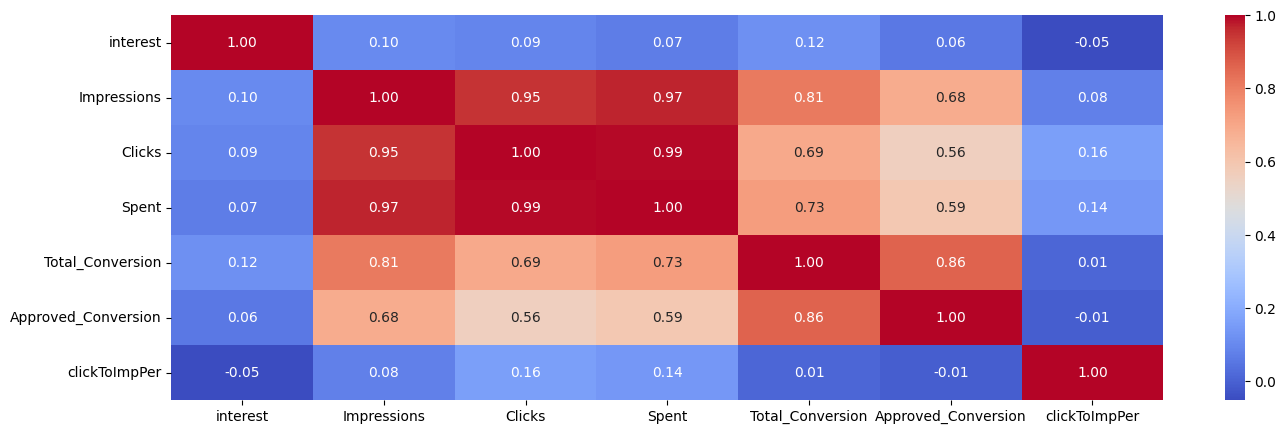

In [31]:
# HEATMAP FOR FINDING THE CORRELATION
plt.figure(figsize=(16,5))
x=sns.heatmap(df[df.columns.difference
                 (['ad_id','fb_campaign_id','xyz_campaign_id','age','gender'],
                   sort=False)].corr(),annot=True ,fmt=".2f", cmap="coolwarm")


# Heatmap of the features. This shows how the features of our data depend on each other

# DATA ANALYSIS USING BUINESS QUESTIONS AND A/B TESTING


1. How to optimize the social ad campaigns for the highest conversion rate possible? (Attain best Reach to Conversion ratios/Click to Conversion ratios)

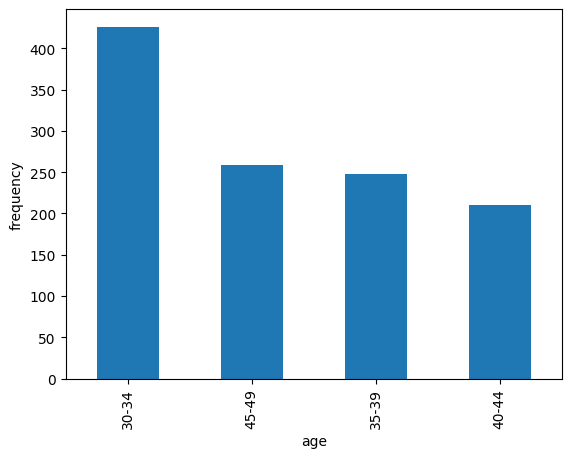

In [32]:
# frequency(count) of people in each age group

fig, ax = plt.subplots()

df['age'].value_counts().plot(ax=ax, kind='bar', xlabel='age', ylabel='frequency')
plt.show()

Male to Female ratio :  1.074410163339383


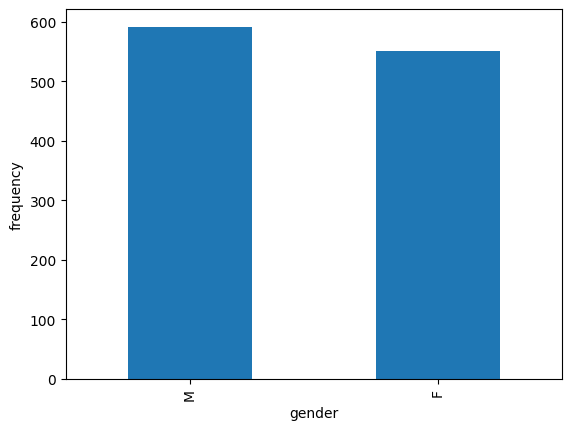

In [33]:
# frequency of people of each gender
print("Male to Female ratio : ", len(df[df['gender']=='M'])/len(df[df['gender']=='F']))

fig, ax = plt.subplots()

df['gender'].value_counts().plot(ax=ax, kind='bar', xlabel='gender', ylabel='frequency')
plt.show()

# The number of males and females are almost equal

In [34]:
# Grouping the data based on age and gender

df2 = df.groupby(['age','gender'],as_index=False)[['interest','Impressions','Spent','Total_Conversion','Clicks']].mean()
df2['clickToImpPer']=df2['Clicks']/df2['Impressions']
df2

,age,gender,interest,Impressions,Spent,Total_Conversion,Clicks,clickToImpPer
0,30-34,F,31.8782,160261.8071,38.6370,3.1421,25.8832,0.0002
1,30-34,M,29.9127,159045.6026,33.3665,3.5459,19.1441,0.0001
2,35-39,F,36.4312,196692.7064,55.6087,2.7890,38.1743,0.0002
3,35-39,M,31.8633,148670.0647,36.3387,2.3165,21.1007,0.0001
4,40-44,F,36.0000,218655.8411,69.1269,3.0093,48.3832,0.0002
5,40-44,M,32.7961,157360.5049,40.7102,1.9515,24.8447,0.0002
6,45-49,F,33.8986,278663.7029,97.3421,2.8913,68.4130,0.0002
7,45-49,M,33.1736,208903.0331,60.4749,2.3554,36.4545,0.0002


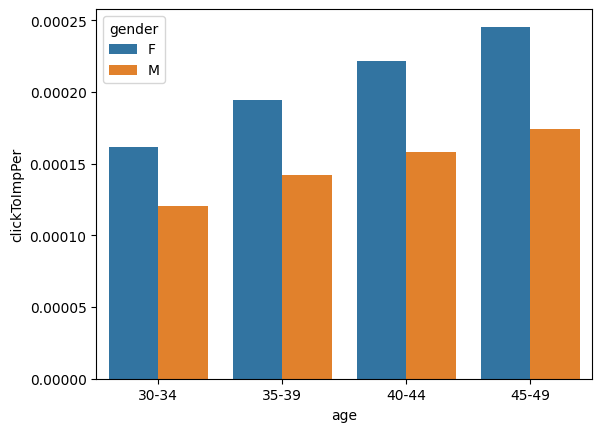

In [35]:
# Click to Impression vs age
sns.barplot(x=df2.age,y=df2.clickToImpPer,hue=df2.gender)
plt.show()

People in age group 45-49 have higher Click to Impression ratio, that is they click on the ads more than any other age group and females of each age group have higher Click to Impression ratio than their male counterparts

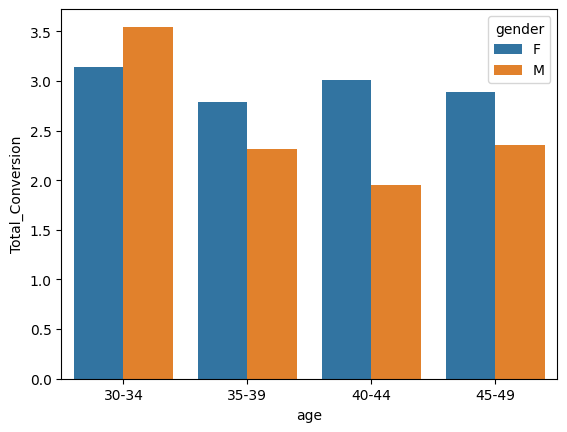

In [36]:
# Total Conversion vs age
sns.barplot(x=df2.age,y=df2.Total_Conversion,hue=df2.gender)
plt.show()

People in age group 30-34 have more total conversion per clicks than any other age group

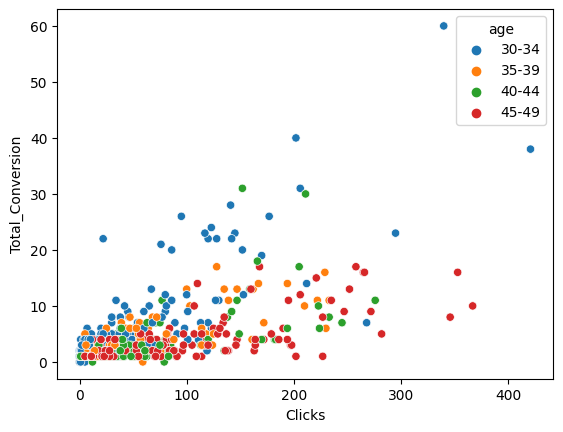

In [37]:
#Total Conversions vs Clicks for each age group
sns.scatterplot(x = df['Clicks'], y = df['Total_Conversion'], hue=df["age"])
plt.show()

In [38]:
# Overall Stats for each age group
df.groupby(['age'],as_index=False)[['interest','Impressions','Spent','Total_Conversion','Clicks']].mean()

,age,interest,Impressions,Spent,Total_Conversion,Clicks
0,30-34,30.8216,159608.0258,35.8038,3.3592,22.2606
1,35-39,33.8710,169776.7903,44.8082,2.5242,28.6048
2,40-44,34.4286,188591.9381,55.1892,2.4905,36.8381
3,45-49,33.5598,246072.8108,80.1184,2.6409,53.4826


Age group 30-34 has higher clicks to conversion ratio than any other group

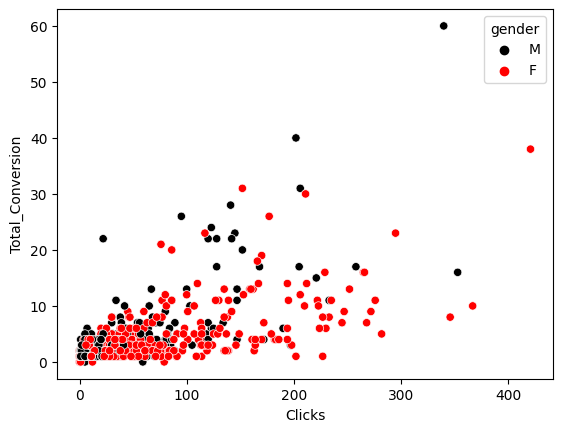

In [39]:
# Total Conversions vs Clicks for each gender 
sns.scatterplot(x = df['Clicks'], y = df['Total_Conversion'], hue=df["gender"], palette = ['black','red'])
plt.show()

In [40]:
# Overall Stats for each gender
df.groupby(['gender'],as_index=False)[['interest','Impressions','Spent','Total_Conversion','Clicks']].mean()

,gender,interest,Impressions,Spent,Total_Conversion,Clicks
0,F,34.0853,208462.5172,62.6182,2.9837,43.3358
1,M,31.5389,166506.7247,40.8828,2.7365,24.1334


For Males the Total conversion per clicks is high than Females

In [41]:
# Group the data based on fb campaigh id
df3=df.groupby("fb_campaign_id")[["interest","Impressions","Spent","Total_Conversion","Clicks","clickToImpPer"]].mean()

In [42]:
scaled = StandardScaler()
scaled_features = scaled.fit_transform(df3.values)

In [43]:
# Standard Scaling the data
df3=pd.DataFrame(scaled_features)
df3 = df3.rename(columns = {0:'interest',1:'Impressions',2:'Spent',3:'Total_Conversion',4:"Clicks",5:"clickToImpPer"})
df3

,interest,Impressions,Spent,Total_Conversion,Clicks,clickToImpPer
0,-0.7185,-0.5442,-0.5375,-0.1055,-0.5282,-0.2420
1,-0.6867,-0.4970,-0.5313,-0.1055,-0.5048,-0.4273
2,-0.5595,-0.5741,-0.5603,-0.4138,-0.5516,-1.2891
3,-0.3052,-0.5584,-0.5401,-0.4138,-0.5282,0.5455
4,-0.2734,-0.5686,-0.5603,-0.4138,-0.5516,-1.2891
...,...,...,...,...,...,...
686,2.2698,4.5003,5.1385,3.2849,5.3462,0.4276
687,2.3015,2.2881,2.2062,0.2027,2.2569,0.1595
688,2.3333,0.1038,0.0807,-0.1055,0.1037,0.1330
689,2.3969,2.9744,2.6012,1.7438,2.6079,0.0257


In [45]:
# Elbow Method
distortions = []
K = range(1,6)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scaled_features)
    distortions.append(kmeanModel.inertia_)

C:\Users\arrur\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\arrur\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\arrur\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\arrur\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

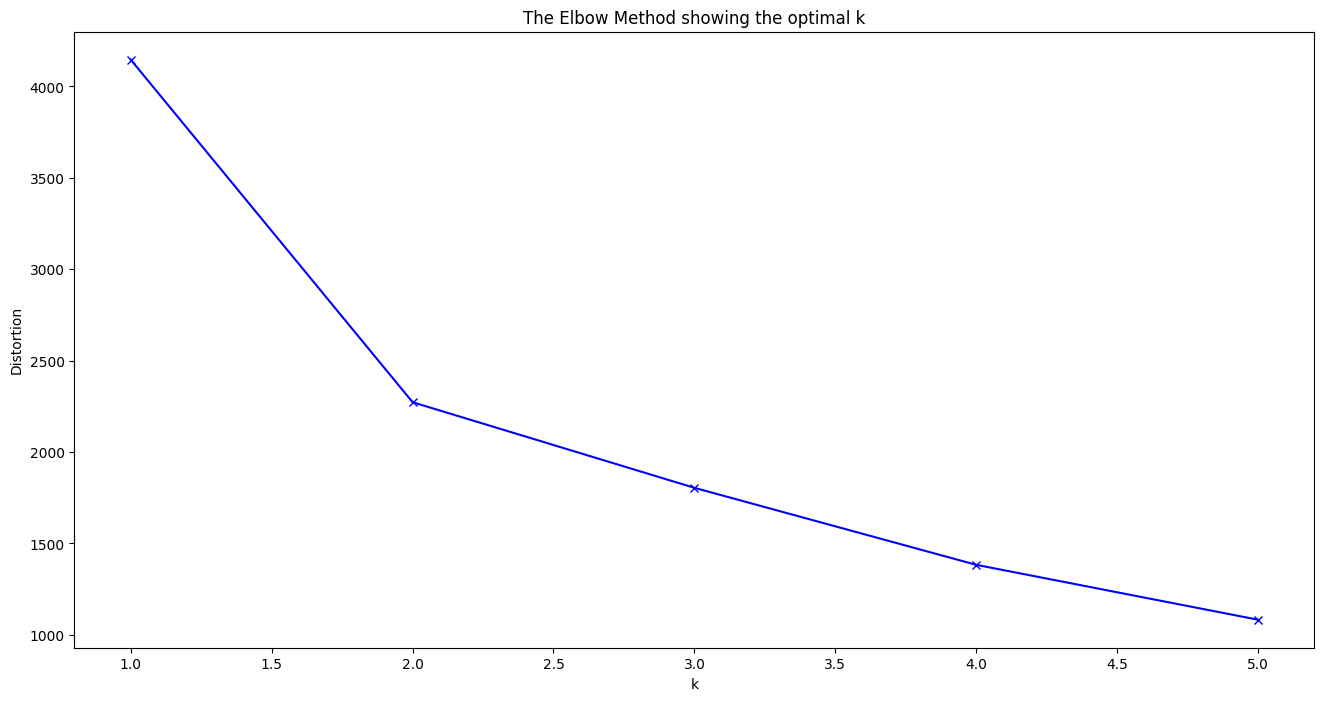

In [46]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Using the elbow method we can clearly see that the optimal number of clusters are 2

In [47]:
# Clustering using K-Means 

model = KMeans(n_clusters=2)
model.fit(scaled_features)
df3['cluster'] = model.predict(scaled_features)

C:\Users\arrur\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


C:\Users\arrur\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


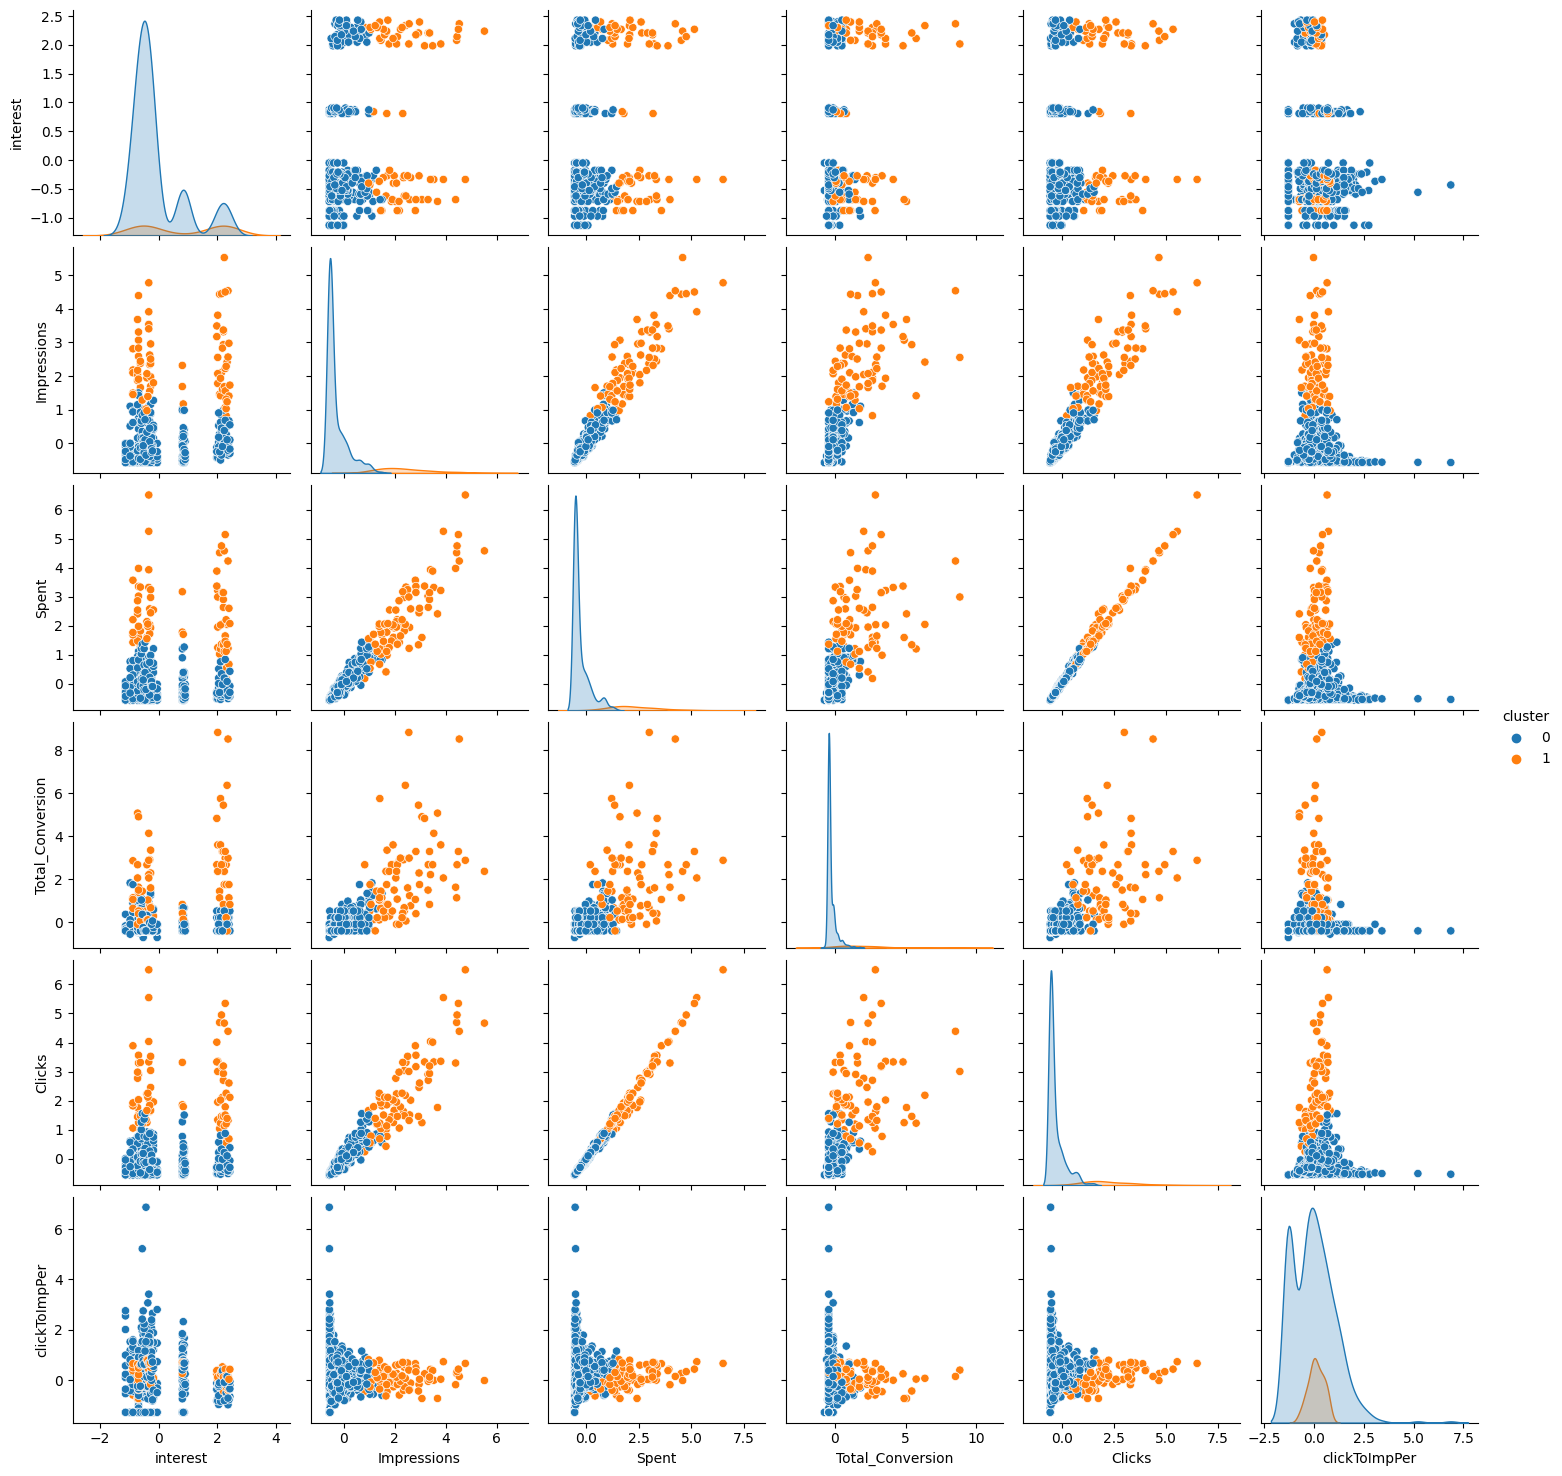

In [48]:
sns.pairplot(df3,hue='cluster')
plt.show()

Conclusion:<br>
Cluster 1 i.e. the orange cluster are the facebook ad campaigns which are already optimised. Thus, we need to optimize the ad campaigns of cluster 0 i.e. the blue cluster. We can clearly see orange cluster is preforming better than the blue cluster here.
These ad camapigns of cluster 0 can be optimised to give better click to conversion ratio

In [49]:
# All the datapoints in 0th cluster
df3[df3["cluster"]==0]

,interest,Impressions,Spent,Total_Conversion,Clicks,clickToImpPer,cluster
0,-0.7185,-0.5442,-0.5375,-0.1055,-0.5282,-0.2420,0
1,-0.6867,-0.4970,-0.5313,-0.1055,-0.5048,-0.4273,0
2,-0.5595,-0.5741,-0.5603,-0.4138,-0.5516,-1.2891,0
3,-0.3052,-0.5584,-0.5401,-0.4138,-0.5282,0.5455,0
4,-0.2734,-0.5686,-0.5603,-0.4138,-0.5516,-1.2891,0
...,...,...,...,...,...,...,...
679,2.0472,0.1810,0.0126,-0.1055,0.0101,-0.1943,0
680,2.0790,-0.2537,-0.3003,-0.4138,-0.2942,-0.1130,0
683,2.1744,-0.0959,-0.0239,-0.4138,-0.0133,0.3637,0
685,2.2380,0.3778,0.1985,0.5109,0.2207,-0.0940,0


2. Finding the perfect target demographics with the appropriate clickthrough rates.

Clickthrough rate: ClickToImpPer = Clicks/Impression

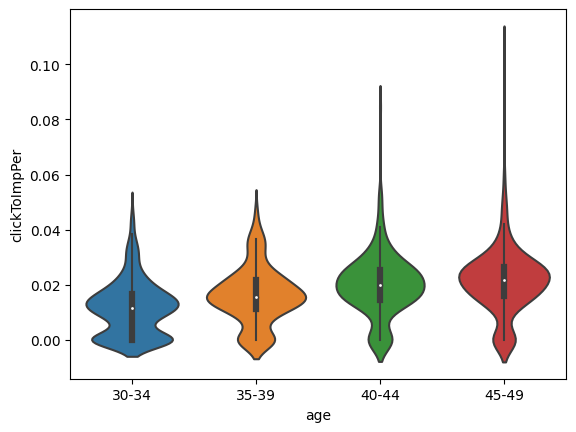

In [50]:
# violin plot for Click to Impression ratio vs age
sns.violinplot(x=df['age'], y=df['clickToImpPer'])
plt.show()

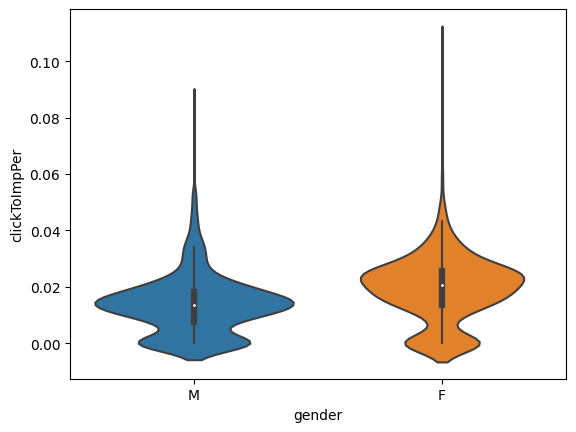

In [53]:
# violin plot for Click to Impression ratio vs Gender
sns.violinplot(x=df['gender'], y=df['clickToImpPer'])
plt.show()

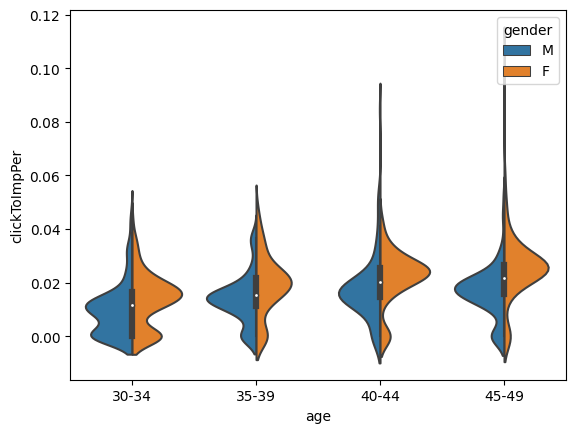

In [54]:
# violin plot for Click to Impression ratio vs age for each gender 
sns.violinplot(x=df['age'], y=df['clickToImpPer'], hue=df["gender"], split=True)
plt.show()

## Conclusion:<br>
The target group of people with higher clickthrough rates are:<br>
Females in age group 45-49<br>
Females in age group 40-44<br>

3. Understanding the ideal turnaround/decision making time per age group to convert and retarget future social campaigns

In [56]:
# Group the data based on age groups
df4 = df.groupby(['age'],as_index=False)[['interest','Impressions','Spent','Total_Conversion','Clicks',"Approved_Conversion"]].mean()
df4['clickToImpPer']=df4['Clicks']/df4['Impressions']
df4

,age,interest,Impressions,Spent,Total_Conversion,Clicks,Approved_Conversion,clickToImpPer
0,30-34,30.8216,159608.0258,35.8038,3.3592,22.2606,1.1596,0.0001
1,35-39,33.8710,169776.7903,44.8082,2.5242,28.6048,0.8347,0.0002
2,40-44,34.4286,188591.9381,55.1892,2.4905,36.8381,0.8095,0.0002
3,45-49,33.5598,246072.8108,80.1184,2.6409,53.4826,0.8031,0.0002


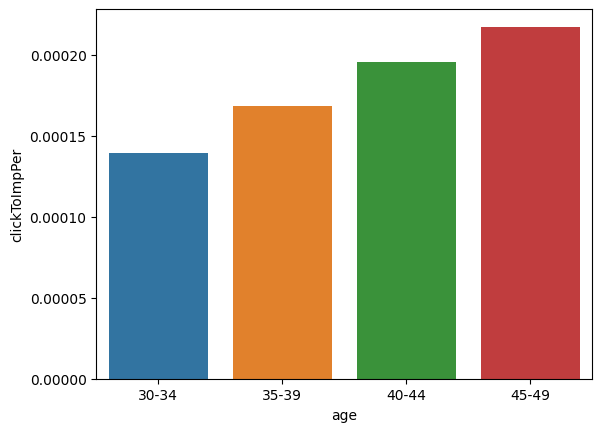

In [57]:
# Click to Impression ratio vs age
sns.barplot(x = df4['age'], y = df4['clickToImpPer'])
plt.show()

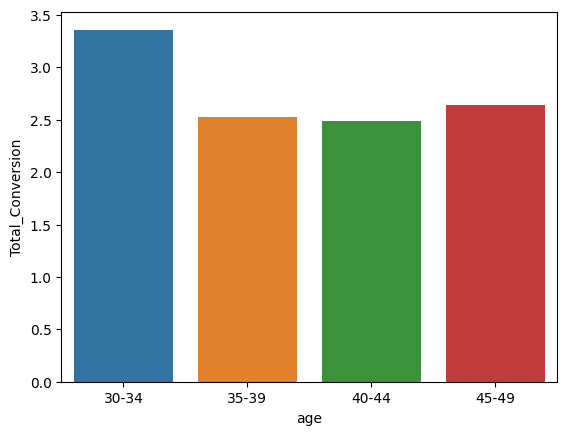

In [58]:
# Total Conversion vs age
sns.barplot(x = df4['age'], y = df4['Total_Conversion'])
plt.show()

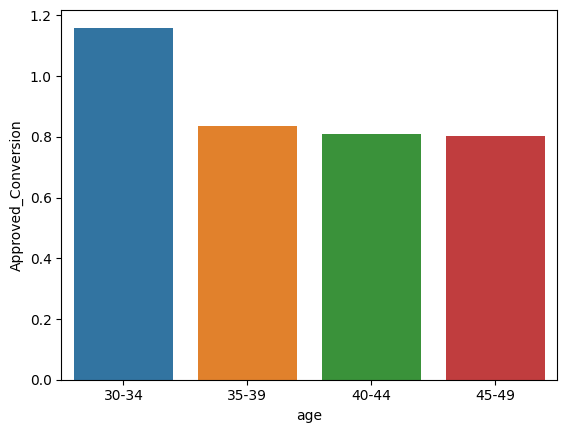

In [59]:
# Approved Conversions vs age
sns.barplot(x = df4['age'], y = df4['Approved_Conversion'])
plt.show()

# Conclusion:<br>
1.The Click to Impression ratio is more for the age group of 45-49. It means they click more often on the ads than other age groups.<br>
2.Althought people in age group 30-34 have less click to impression ratio but they have high total conversions. It means they enquire more about the products than any other age groups.<br>
3.The age group 30-34 have high approved conversions than other age groups, i.e, they buy more products than other people.<br>

4. Comparing the individual campaign performance so the best creative/campaign can be run again with adjusted audiences.

In [61]:
# Group the data based on xyz_campaign id
tempdf=df.groupby(['xyz_campaign_id'],as_index=False)[['interest','Impressions','Spent','Total_Conversion','Clicks',"Approved_Conversion"]].mean()
tempdf['clickToImpPer']=tempdf['Clicks']/tempdf['Impressions']
tempdf

,xyz_campaign_id,interest,Impressions,Spent,Total_Conversion,Clicks,Approved_Conversion,clickToImpPer
0,916,21.9815,8943.0556,2.7724,1.0741,2.0926,0.4444,0.0002
1,936,25.0474,17517.6444,6.2357,1.1573,4.2759,0.3944,0.0002
2,1178,39.4288,327717.9456,89.0594,4.2704,57.7088,1.3952,0.0002


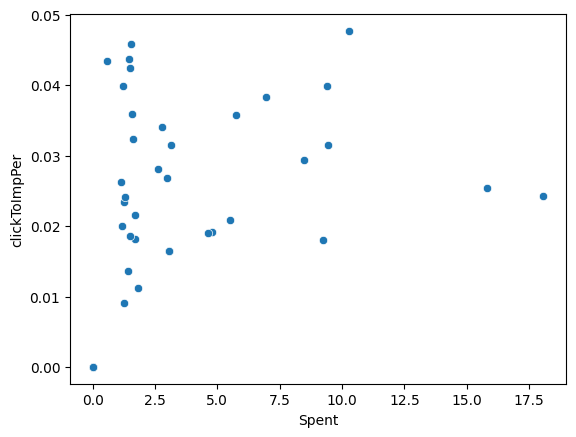

In [62]:
# Plot for Click to Impression ratio vs Expenditure for Company 1
sns.scatterplot(x=df[df["xyz_campaign_id"]==916]["Spent"],y=df[df["xyz_campaign_id"]==916]["clickToImpPer"])
plt.show()

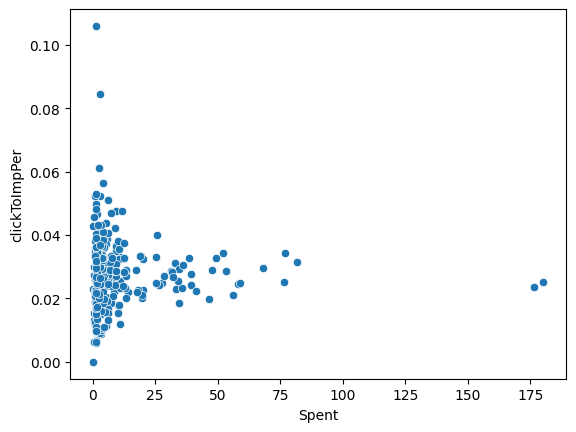

In [63]:
# Plot for Click to Impression ratio vs Expenditure for Company 2
sns.scatterplot(x=df[df["xyz_campaign_id"]==936]["Spent"],y=df[df["xyz_campaign_id"]==936]["clickToImpPer"])
plt.show()

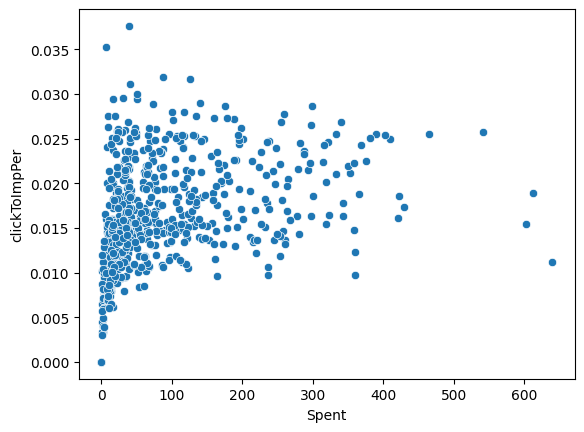

In [64]:
# Plot for Click to Impression ratio vs Expenditure for Company 3
sns.scatterplot(x=df[df["xyz_campaign_id"]==1178]["Spent"],y=df[df["xyz_campaign_id"]==1178]["clickToImpPer"])
plt.show()

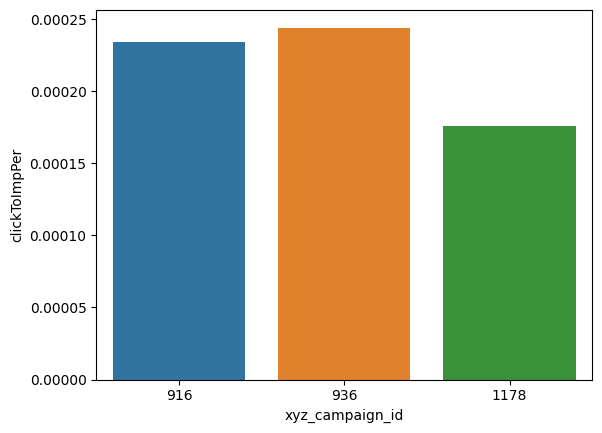

In [65]:
# Plot for CLick to Impression ratio vs xyz_campaign_id
sns.barplot(x = tempdf['xyz_campaign_id'], y = tempdf['clickToImpPer'])
plt.show()

Company_1


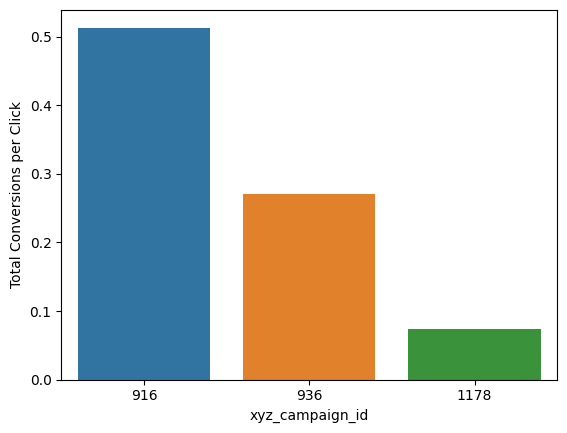

In [72]:
# Plot for Total Conversions per Click for each Company
print('Company_1')
ax = sns.barplot(x = tempdf['xyz_campaign_id'], y = tempdf['Total_Conversion']/tempdf["Clicks"])
ax.set(xlabel='xyz_campaign_id', ylabel='Total Conversions per Click')
plt.show()

Company_2


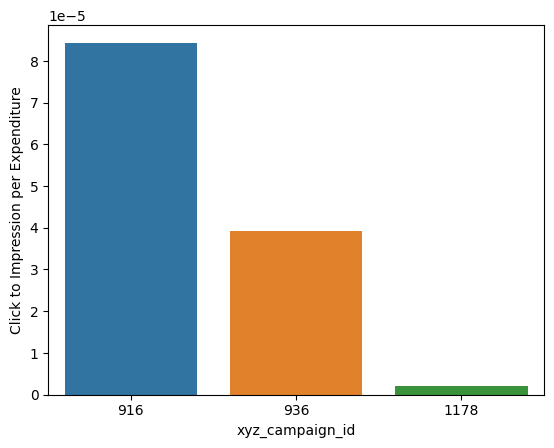

In [73]:
print('Company_2')
ax = sns.barplot(x = tempdf['xyz_campaign_id'], y = tempdf['clickToImpPer']/tempdf['Spent'])
ax.set(xlabel='xyz_campaign_id', ylabel='Click to Impression per Expenditure')
plt.show()

Company_3


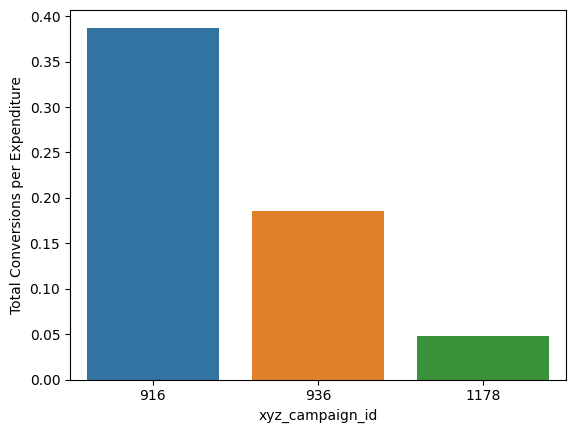

In [74]:
print('Company_3')
ax = sns.barplot(x = tempdf['xyz_campaign_id'], y = tempdf['Total_Conversion']/tempdf['Spent'])
ax.set(xlabel='xyz_campaign_id', ylabel='Total Conversions per Expenditure')
plt.show()

# Conclusion:<br>
1.The total number of conversions for Company 3 is more. This is because it has relatively very high number of datapoints.<br>
2.The click to impression ratio is higher for Company 2.<br>
3.For Company 1 the total conversions per expenditure, click to impression ratio per expenditure and total conversions per click is higher that other.<br>
4.Therefore, Company 1 has the best campaign performance.<br>

# A/B TESTING

In [84]:
# H0: Normal distribution assumption is true.
# H1: False.

# If p-value < 0.05, H0 = Reject
# If p-value > 0.05 H0 = Cannot Reject.

# Normal Distribution control for Id 939

test_stat, pvalue = shapiro(df.loc[df["xyz_campaign_id"] == 936, "Impressions"])
print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

# Normal Distribution control for Id 1178

test_stat, pvalue = shapiro(df.loc[df["xyz_campaign_id"] == 916, "Impressions"])
print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test Stat = 0.3912, p-value = 0.0000
Test Stat = 0.6933, p-value = 0.0000


In [81]:

# Variance Homogeneity Assumption:


# H0: Variance is homogeneous.
# H1: Variance is not homogeneous.

# If p-value < 0.05, H0 = Reject
# If p-value > 0.05 H0 = Cannot Reject.
from scipy.stats import levene

test_stat, pvalue = levene(df.loc[df["xyz_campaign_id"] == 936, "Impressions"],
                            df.loc[df["xyz_campaign_id"] == 916, "Impressions"])
print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

# According to p-values, H0 =  Cannot Reject

Test Stat = 2.3178, p-value = 0.1285


In [83]:

# Apply of the Hypothesis:

from scipy.stats import mannwhitneyu


test_stat, pvalue = mannwhitneyu(df.loc[df["xyz_campaign_id"] == 936, "Impressions"],
                            df.loc[df["xyz_campaign_id"] == 916, "Impressions"])
print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

# If p-value < 0.05, H0 = Reject
# If p-value > 0.05 H0 = Cannot Reject.

Test Stat = 13311.5000, p-value = 0.4520


# Conclusion and Recommendation

The result of the Mann-Whitney U test, p-value calculated as 0.4520, and it means H0 = Cannot Reject according to Hypothesis assumption, and its meaning for the A/B Testing, both advertesing strategy results are occurred just accidentally.